In [289]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import datetime

## Q1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data.

In [290]:
claim=pd.read_csv('D:/sampledata/Insurance Claims Case Study/claims.csv')


In [291]:
cust=pd.read_csv('D:/sampledata/Insurance Claims Case Study/cust_demographics.csv')

In [292]:
claim.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [293]:
cust.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [294]:
data=pd.merge(left=claim,right=cust,left_on='customer_id',right_on= 'CUST_ID',how='inner')

In [295]:
data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


## Q2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [296]:
data.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [297]:
data['DateOfBirth']=pd.to_datetime(data.DateOfBirth,format="%d-%b-%y")

In [298]:
data['DateOfBirth']

0      1979-01-12
1      1970-01-13
2      1984-03-11
3      1984-03-11
4      1986-05-01
          ...    
1080   1981-03-15
1081   1996-07-07
1082   1990-04-11
1083   2064-10-22
1084   1995-07-12
Name: DateOfBirth, Length: 1085, dtype: datetime64[ns]

In [299]:
data.loc[(data.DateOfBirth.dt.year>2020),'DateOfBirth']=data[data.DateOfBirth.dt.year>2020]['DateOfBirth'].apply(lambda x:x-pd.DateOffset(years=100))

In [300]:
data.DateOfBirth

0      1979-01-12
1      1970-01-13
2      1984-03-11
3      1984-03-11
4      1986-05-01
          ...    
1080   1981-03-15
1081   1996-07-07
1082   1990-04-11
1083   1964-10-22
1084   1995-07-12
Name: DateOfBirth, Length: 1085, dtype: datetime64[ns]

In [301]:
data["claim_date"] = pd.to_datetime(data.claim_date, format = "%m/%d/%Y")

In [302]:
data["Contact"] = pd.to_numeric(data.Contact.str.replace("-",""),downcast='float')

## Q3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the sign.

In [303]:
data['claim_amount']=pd.to_numeric(data.claim_amount.str.replace("$",""))

In [304]:
data.claim_amount

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1080     1770.0
1081     2800.0
1082    33080.0
1083     2840.0
1084     1490.0
Name: claim_amount, Length: 1085, dtype: float64

In [305]:
data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float32
Segment                        object
dtype: object

In [306]:
data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,2.655431e+09,Silver


## Q4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [307]:
data['Flag'] = np.where(data.police_report == 'Unknown',0,1)
data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,1
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,1
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,1
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,4.594254e+09,Platinum,1
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,5.294622e+09,Silver,1
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,7.126520e+09,Gold,1
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,4.693456e+09,Silver,1


In [308]:
data.drop(columns='police_report',inplace=True)

## Q5. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [309]:
data.drop_duplicates(subset='CUST_ID',keep='first')

,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,1
1,33985796,75740424,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,1
4,13015401,47830476,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,1
6,22890252,19269962,Crime,2018-01-13,Auto,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,9.568719e+09,Gold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,4.594254e+09,Platinum,1
1081,63269067,42364152,Other causes,2017-05-09,Home,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,5.294622e+09,Silver,1
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,7.126520e+09,Gold,1
1083,12376894,11256802,Other driver error,2017-04-18,Auto,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,4.693456e+09,Silver,1


## Q6. Check for missing values and impute the missing values with an appropriate value.(mean for continuous and mode for categorical)

In [310]:
data.dtypes[data.dtypes=='object'].index.values

array(['incident_cause', 'claim_area', 'claim_type', 'fraudulent',
       'gender', 'State', 'Segment'], dtype=object)

In [311]:
data.dtypes[data.dtypes!='object'].index.values

array(['claim_id', 'customer_id', 'claim_date', 'claim_amount',
       'total_policy_claims', 'CUST_ID', 'DateOfBirth', 'Contact', 'Flag'],
      dtype=object)

In [312]:
data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float32
Segment                        object
Flag                            int32
dtype: object

In [313]:
data.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
Flag                    0
dtype: int64

In [314]:
conti=data.loc[:,data.dtypes!='object']
conti.head()

,claim_id,customer_id,claim_date,claim_amount,total_policy_claims,CUST_ID,DateOfBirth,Contact,Flag
0,54004764,21868593,2017-11-27,2980.0,1.0,21868593,1979-01-12,7.899168e+09,1
1,33985796,75740424,2018-10-03,2980.0,3.0,75740424,1970-01-13,2.655431e+09,0
2,53522022,30308357,2018-02-02,3369.5,1.0,30308357,1984-03-11,7.986315e+09,1
3,63017412,30308357,2018-04-04,1950.0,6.0,30308357,1984-03-11,7.986315e+09,1
4,13015401,47830476,2018-06-17,1680.0,1.0,47830476,1986-05-01,4.131878e+09,1


In [315]:
cat=data.loc[:,data.dtypes=='object']
cat.head()

,incident_cause,claim_area,claim_type,fraudulent,gender,State,Segment
0,Driver error,Auto,Material only,No,Female,VT,Platinum
1,Crime,Home,Material only,No,Female,ME,Silver
2,Other driver error,Auto,Material only,Yes,Female,TN,Silver
3,Driver error,Auto,Material only,No,Female,TN,Silver
4,Natural causes,Auto,Material only,No,Female,MA,Silver


In [316]:
data['total_policy_claims']=data['total_policy_claims'].replace(np.nan,data['total_policy_claims'].mean())

In [317]:
data['claim_amount']=data['claim_amount'].replace(np.nan,data['claim_amount'].mean())

In [318]:
data.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
Flag                   0
dtype: int64

# Q7. Calculate the age of customers in years. Based on the age, categorize the customers

In [319]:
from datetime import datetime as dt
data['age']=round((data.claim_date-data.DateOfBirth).apply(lambda x:x.days)/365,2)
data.age

0       38.90
1       48.75
2       33.92
3       34.09
4       32.15
        ...  
1080    37.50
1081    20.85
1082    27.11
1083    52.52
1084    21.69
Name: age, Length: 1085, dtype: float64

In [320]:
data.loc[(data.age < 18),'AgeGroup'] = 'Children'
data.loc[(data.age >=18) & (data.age <30),'AgeGroup'] = 'Youth'
data.loc[(data.age >=30) & (data.age <60),'AgeGroup'] = 'Adult'
data.loc[(data.age >=60),'AgeGroup'] = 'Senior'

In [321]:
pd.crosstab(data.customer_id,data.AgeGroup)

AgeGroup,Adult,Children,Youth
customer_id,,,
154557,1,0,0
263204,1,0,0
287476,0,0,1
441097,1,0,0
524545,1,0,0
...,...,...,...
99674324,1,0,0
99723844,1,0,0
99761663,1,0,0


 ## Q8. What is the average amount claimed by the customers from various segments?

In [322]:
data.groupby('Segment').claim_amount.mean().reset_index()

,Segment,claim_amount
0,Gold,12829.631974
1,Platinum,12341.952267
2,Silver,12208.435570


## Q9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [334]:
date=data.loc[data.claim_date<'2018-9-10',:]

In [331]:
date.groupby('incident_cause').claim_amount.sum()

incident_cause
Crime                 7.244484e+05
Driver error          3.319952e+06
Natural causes        1.314121e+06
Other causes          3.724985e+06
Other driver error    3.318770e+06
Name: claim_amount, dtype: float64

## Q10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [393]:
data.loc[(data.incident_cause.str.lower().str.contains('driver'))&((data.State=='TX')|(data.State=='DE')|(data.State=='AK'))&(data.AgeGroup=='Adult')].groupby('State')['State'].count()

State
AK    9
DE    9
TX    6
Name: State, dtype: int64

## Q11. Draw a pie chart between the aggregated value of claim amount based on gender and segment.

In [425]:
res=data.pivot_table(index='Segment',columns='gender',values='claim_amount',aggfunc='sum')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1C61BFD88>,
      dtype=object)

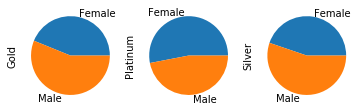

In [429]:
res.T.plot(kind='pie',subplots=True,legend=False)

## Q12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [455]:
a=data.loc[(data.incident_cause.str.lower().str.contains('driver'))]

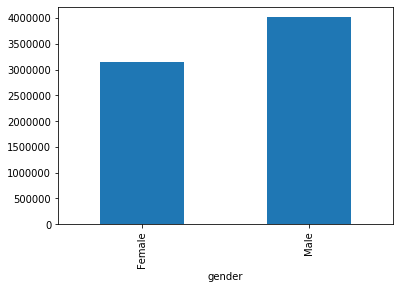

In [457]:
a.groupby('gender').claim_amount.sum().plot(kind='bar')

### As we can see from the above figure and the value we got, it is been clear that male has claimed the most for any type of driver related issues.

## Q13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [459]:
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Flag,age,AgeGroup,ag
0,54004764,21868593,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,1,38.90,Adult,NaN
1,33985796,75740424,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,0,48.75,Adult,NaN
2,53522022,30308357,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,1,33.92,Adult,NaN
3,63017412,30308357,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,1,34.09,Adult,NaN
4,13015401,47830476,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,1,32.15,Adult,NaN


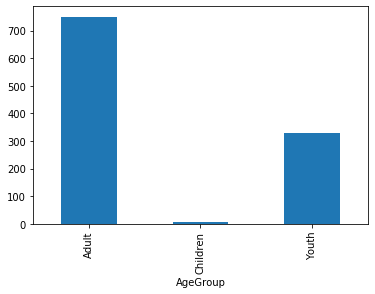

In [461]:
data.groupby(['AgeGroup']).fraudulent.count().plot(kind='bar')

## Q14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [469]:
date=data.claim_date.apply(lambda x:x.month)

In [471]:
data['month']=data.claim_date.dt.month

KeyboardInterrupt: 

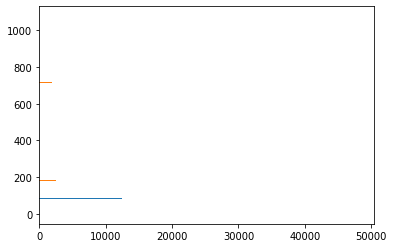

In [480]:
data.pivot_table(index='customer_id',columns='month', values='claim_amount',aggfunc='sum').plot(kind='barh')

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.
### 16. Is there any similarity in the amount claimed by males and females? 

In [482]:
data['claim_amount'].loc[data['gender']=="Male"]

6        2680.0
7        2240.0
8       38306.5
9       36810.0
10       1730.0
         ...   
1077     2290.0
1078     2320.0
1079     2173.5
1082    33080.0
1084     1490.0
Name: claim_amount, Length: 556, dtype: float64

In [484]:
data.groupby('gender').claim_amount.mean()

gender
Female    12062.634707
Male      12853.058506
Name: claim_amount, dtype: float64

### Two Sample t-Test(Independent)

* Since the significance value of the test is greater than 0.05, we can safely conclude that there is a similarity between amount claimed by males and females

### 17. Is there any relationship between age category and segment?

In [486]:
pd.crosstab(data.AgeGroup,data.Segment, margins = True)

Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,265,242,243,750
Children,3,4,0,7
Youth,107,116,105,328
All,375,362,348,1085


### Chi-Square Test

* Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was 10,000.

### 19. Is there any difference between age groups and insurance claims?

### F-Test/Anova

* Since the significance value of the test is greater than 0.05, we fail reject the null hypothesis. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims

### 20. Is there any relationship between total number of policy claims and the claimed amount?

### Correlation

In [488]:
data.total_policy_claims.count()

1085

In [492]:
np.corrcoef(data.total_policy_claims,data.claim_amount)

array([[ 1.        , -0.01744856],
       [-0.01744856,  1.        ]])